# K-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([
    [0.2, 0.5],
    [0.4, 0.1],
    [0.3, 0.3],
    [1.0, 1.2],
    [1.3, 1.1],
    [1.4, 1.0]
])

mu_init = np.array([
    [1.1, 1.1],
    [1.3, 0.8]
])

(0, 1.5)

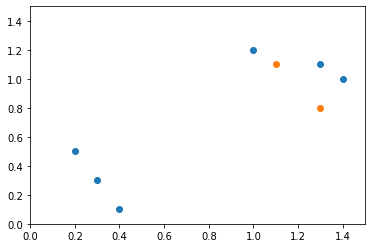

In [3]:
plt.scatter(*data.T)
plt.scatter(*mu_init.T)
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

In [4]:
# Initialize centers
mu = mu_init

# Create array to store labels
n = len(data)
labels = np.array([None]*n)

# This calculates the squared distance between a single point and all centroids.
sqdist = lambda point, centers: np.linalg.norm(point - centers, axis=1)**2

# Repeat until convergence
max_iter = 10
m = 0
while m < max_iter:
    
    for i in range(len(data)):

        # Assign each point the label of the centroid with the minimum squared dist.
        labels[i] = np.argmin(sqdist(data[i], mu))

    # Update each centroids to be the mean of the points assigned to it.
    new_mu = np.array([
        data[labels == 0].mean(axis=0),
        data[labels == 1].mean(axis=0)
    ])

    # Print out the centroids!
    print(f"Iteration {m+1}")
    print(f"\tmu1 = {new_mu[0].round(3)}\tmu2 = {new_mu[1].round(3)}")

    # If new centroids are the same as previous (with some tolerance) end interation.
    if np.allclose(new_mu, mu):
        print("Converged!")
        break
    else:
        mu = new_mu
        m += 1

Iteration 1
	mu1 = [0.833 0.933]	mu2 = [0.7   0.467]
Iteration 2
	mu1 = [1.233 1.1  ]	mu2 = [0.3 0.3]
Iteration 3
	mu1 = [1.233 1.1  ]	mu2 = [0.3 0.3]
Converged!


In [5]:
# We can validate our result using sklearn.
import sklearn.cluster

kmeans = sklearn.cluster.KMeans(2, init=mu_init)
kmeans.fit(data)

kmeans.cluster_centers_

array([[1.23333333, 1.1       ],
       [0.3       , 0.3       ]])

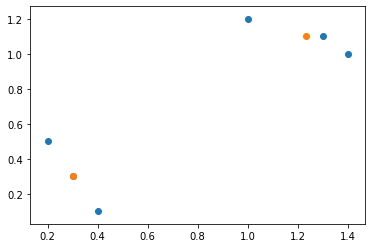

In [6]:
plt.scatter(*data.T)
plt.scatter(*kmeans.cluster_centers_.T)

In [7]:
kmeans.n_iter_

3